# Create plots for panels used in figure S4

In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import dclab
import warnings
warnings.filterwarnings('ignore')

In [3]:
result_folder = r"data\RTfDC\RBC"
savefolder = r"plots\SI\fig_S4"

In [4]:
data_LM_9w_RBC = {'date': '2017-11-07','events': 19455, 'flow rate': 0.02, '% gated': 88.4278,
                     'median area_um': 41.7316, 'mean area_um': 41.733, 'sd area_um': 3.67772,
                     'median deform': 0.180168, 'mean deform': 0.178471, 'sd deform': 0.0270663}

data_LM_9w_reti = {'date': '2017-11-07','events': 1088, 'flow rate': 0.02, '% gated': 5.59239,
                     'median area_um': 43.0032, 'mean area_um': 42.8963, 'sd area_um': 3.90582,
                     'median deform': 0.169558, 'mean deform': 0.170496, 'sd deform': 0.029235}

rbc_ctrl_medians = {'area_um': 34.62220001220703, 'deform': 0.26245954632759094}

In [5]:
def plot_retis(patients, labels, y_value, fontsize= 32):

    flow_rate = 0.02

    linewidth = 6
    markersize = 15
    linealpha = .8
    #errorbar formatting
    errbar_width = 8

    if patients[0]=='KM':
        colors = sns.color_palette('tab20')[6:]
    else:
        colors = sns.color_palette('tab20')

    with sns.axes_style('darkgrid'):
        fig = plt.figure(0,(10,6.6))
        ax1 = plt.subplot(111)

        ax_xlabel = "Day since treatment start"
        ax_ylabel = dclab.dfn.feature_name2label[y_value]

        ax1.set_xlabel(ax_xlabel, fontsize=fontsize+2)
        ax1.set_ylabel(ax_ylabel, fontsize=fontsize+2)

        for ind, patient in enumerate(patients):

            result_file = "20200527_results_RTfDC_" + patient + ".tsv"
            result_path = os.path.join(result_folder, result_file)

            df = pd.read_csv(result_path, sep='\t')
            df_retis = df[df['syto13_pos']==True]

            df_date_grouped_mean = df.groupby(['date', 'flow rate']).median().reset_index()
            df_date_grouped_mean_retis = df_retis.groupby(['date', 'flow rate']).median().reset_index()
            df_date_grouped_std = df.groupby(['date', 'flow rate']).std().reset_index()
            df_date_grouped_std_retis = df_retis.groupby(['date', 'flow rate']).std().reset_index()

            dates = pd.to_datetime(df_date_grouped_mean.reset_index()['date'])
            day0=dates[0]
            time = dates - day0
            df_date_grouped_mean['delta_days'] = time.dt.days #convert datetime in ns to days
            df_date_grouped_std['delta_days'] = time.dt.days


            dates = pd.to_datetime(df_date_grouped_mean_retis.reset_index()['date'])
            day0=dates[0]
            time = dates - day0
            df_date_grouped_mean_retis['delta_days'] = time.dt.days #convert datetime in ns to days
            df_date_grouped_std_retis['delta_days'] = time.dt.days

            color = colors[2*ind]
            color_retis = colors[2*ind+1]

            #flow rate range from 0.004 - 0.02 ul/s
            ii = np.round(df_date_grouped_mean['flow rate'], 3) == flow_rate
            x = df_date_grouped_mean['delta_days'][ii]
            y = df_date_grouped_mean[y_value][ii]
            yerr = df_date_grouped_std[y_value][ii]

            ii = np.round(df_date_grouped_mean_retis['flow rate'], 3) == flow_rate
            x_retis = df_date_grouped_mean_retis['delta_days'][ii]
            y_retis = df_date_grouped_mean_retis[y_value][ii]
            yerr_retis = df_date_grouped_std_retis[y_value][ii]

            ax1.errorbar(x[:-1], y[:-1], yerr=yerr[:-1], ls='-', lw=linewidth, marker='o', c=color,
                         ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width, label = labels[ind])
            ax1.errorbar(x[-2:], y[-2:], yerr=yerr[-2:], ls='--', lw=linewidth, marker='o', c=color, ecolor='gray',
                         alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width)


            if patient=='RS':
                ax1.errorbar(x_retis, y_retis, yerr=yerr_retis, ls='-', lw=linewidth, marker='o',
                             c=color_retis, ecolor='gray',
                             alpha=linealpha, markersize = markersize, elinewidth=errbar_width,
                             label = labels[ind]+" reticulocytes")
            else:
                ax1.errorbar(x_retis[:-1], y_retis[:-1], yerr=yerr_retis[:-1], ls='-', lw=linewidth, marker='o',
                             c=color_retis, ecolor='gray',
                             alpha=linealpha, markersize = markersize, elinewidth=errbar_width,
                             label = labels[ind]+" reticulocytes")
                ax1.errorbar(x_retis[-2:], y_retis[-2:], yerr=yerr_retis[-2:], ls='--', lw=linewidth, marker='o',
                             c=color_retis, ecolor='gray',
                             alpha=linealpha, markersize = markersize, elinewidth=errbar_width)

        ax1.axhline(rbc_ctrl_medians[y_value], c='darkgray', alpha=.75, ls='--', lw=1.5*linewidth,
                    zorder=0,label='CTRL')
        plt.legend(fontsize=fontsize-4, ncol=2)
        ax1.tick_params(axis='both', labelsize=fontsize-2)

        #set alpha of errorbars
        for collection in ax1.collections:
            collection.set_alpha(.3)

        plt.tight_layout()

    return fig, ax1

## A

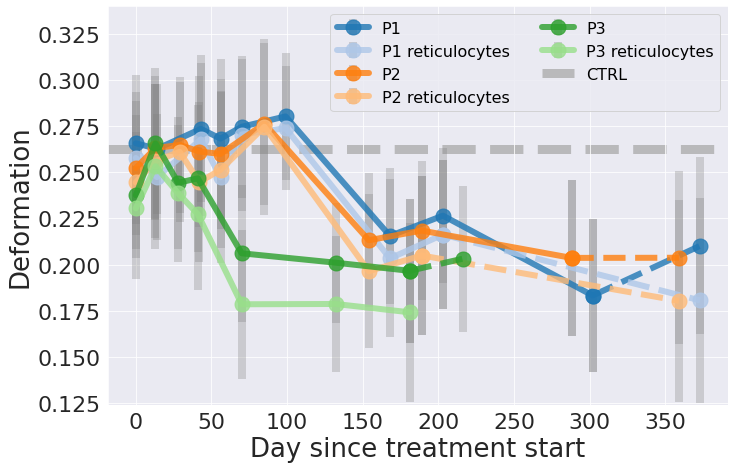

In [6]:
patients = ['VS', 'VL', 'RS']
labels = ['P1', 'P2', 'P3']
y_value = 'deform'

fontsize = 24
fig, ax = plot_retis(patients, labels, y_value, fontsize=fontsize)
ax.set_ylim(0.124,0.34)
handles, labels = ax.get_legend_handles_labels()
handles = np.roll(handles, -1)
labels = np.roll(labels, -1)

ax.legend(handles, labels, fontsize=fontsize-8, ncol=2, loc='upper right', facecolor=ax.get_facecolor())

In [7]:
save_name = "fig_S4A_RBC_retis_dasatinib_deform"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

## B

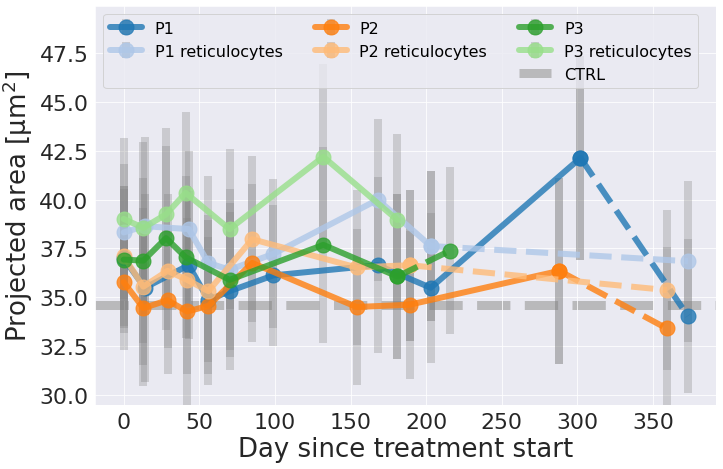

In [8]:
patients = ['VS', 'VL', 'RS']
labels = ['P1', 'P2', 'P3']
y_value = 'area_um'

fontsize = 24
fig, ax = plot_retis(patients, labels, y_value, fontsize=fontsize)
ax.set_ylim(29.5, 49.9)
ax.set_ylabel(r"Projected area [µm$^2$]", fontsize=fontsize+2)

handles, labels = ax.get_legend_handles_labels()
handles = list(np.roll(handles, -1))
labels = list(np.roll(labels, -1))
empty_r = patches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none',
                            visible=False)
handles.insert(2, empty_r)
labels.insert(2, " ")
handles.insert(5, empty_r)
labels.insert(5, " ")
ax.legend(handles, labels, fontsize=fontsize-8, ncol=3, loc='upper left', facecolor=ax.get_facecolor())

In [9]:
save_name = "fig_S4B_RBC_retis_dasatinib_area"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

## C

Need to create custom color palette to fit the color scheme of other plots

In [10]:
colors = sns.color_palette(sns.color_palette('tab20')[8:10] + sns.color_palette('tab20')[6:8])

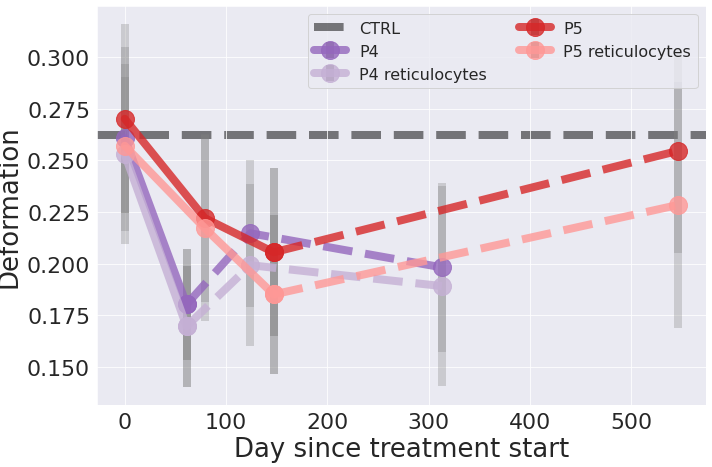

In [11]:
patients = ['LM', 'KM']
labels = ['P4', 'P5']

y_value = 'deform'

flow_rate1 = 0.02

fontsize= 24
linewidth = 8
markersize = 18
linealpha = .8
#errorbar formatting
markerwidth = 12
errbar_width = 8

with sns.axes_style('darkgrid'):
    plt.figure(0,(10,6.6))
    ax1 = plt.subplot(111)

    ax_xlabel = "Day since treatment start"
    ax_ylabel = dclab.dfn.feature_name2label[y_value]

    ax1.set_xlabel(ax_xlabel, fontsize=fontsize+2)
    ax1.set_ylabel(ax_ylabel, fontsize=fontsize+2)

    for ind, patient in enumerate(patients):

        result_file = "20200527_results_RTfDC_" + patient + ".tsv"
        result_path = os.path.join(result_folder, result_file)

        df = pd.read_csv(result_path, sep='\t')
        df = df[np.round(df['flow rate'], 3) == flow_rate1]
        df_retis = df[df['syto13_pos']==True]

        df_date_grouped_mean = df.groupby(['date']).median().reset_index()
        df_date_grouped_mean_retis = df_retis.groupby(['date']).median().reset_index()
        df_date_grouped_std = df.groupby(['date']).std().reset_index()
        #line above doesn't work for unknown reasons
        df_date_grouped_std_retis = pd.DataFrame()
        for date in df_retis.date.unique():
            stds = df_retis[df_retis['date']==date].std()
            stds['date']=date
            df_date_grouped_std_retis = df_date_grouped_std_retis.append(stds, ignore_index=True)

        dates = pd.to_datetime(df_date_grouped_mean.reset_index()['date'])
        day0=dates[0]
        time = dates - day0
        df_date_grouped_mean['delta_days'] = time.dt.days #convert datetime in ns to days
        df_date_grouped_std['delta_days'] = time.dt.days

        dates = pd.to_datetime(df_date_grouped_mean_retis.reset_index()['date'])
        day0=dates[0]
        time = dates - day0
        df_date_grouped_mean_retis['delta_days'] = time.dt.days #convert datetime in ns to days
        df_date_grouped_std_retis['delta_days'] = time.dt.days

        color = colors[2*ind]
        color_retis = colors[2*ind+1]

        x = df_date_grouped_mean['delta_days']
        y = df_date_grouped_mean[y_value]
        yerr = df_date_grouped_std[y_value]

        x_retis = df_date_grouped_mean_retis['delta_days']
        y_retis = df_date_grouped_mean_retis[y_value]
        yerr_retis = df_date_grouped_std_retis[y_value]

        x = np.array(x)
        y = np.array(y)
        yerr = np.array(yerr)
        x_retis = np.array(x_retis)
        y_retis = np.array(y_retis)
        yerr_retis = np.array(yerr_retis)

        if patient=='LM':
            date_LM_9w = pd.to_datetime(data_LM_9w_RBC['date'])
            time_LM_9w = (date_LM_9w - day0).days
            y_LM_9w = data_LM_9w_RBC['median ' + y_value]
            yerr_LM_9w = data_LM_9w_RBC['sd ' + y_value]

            x = np.insert(x,1,time_LM_9w)
            y = np.insert(y,1,y_LM_9w)
            yerr = np.insert(yerr,1,yerr_LM_9w)

            date_LM_9w_retis = pd.to_datetime(data_LM_9w_reti['date'])
            time_LM_9w_retis = (date_LM_9w_retis - day0).days
            y_LM_9w_retis = data_LM_9w_reti['median ' + y_value]
            yerr_LM_9w_retis = data_LM_9w_reti['sd ' + y_value]

            x_retis = np.insert(x_retis, 1, time_LM_9w_retis)
            y_retis = np.insert(y_retis, 1, y_LM_9w_retis)
            yerr_retis = np.insert(yerr_retis, 1, yerr_LM_9w_retis)

            ax1.errorbar(x[:-2],y[:-2], yerr=yerr[:-2], ls='-', lw=linewidth, marker='o', c=color, ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width, label = labels[ind])
            ax1.errorbar(x[-3:],y[-3:], yerr=yerr[-3:], ls='--', lw=linewidth, marker='o', c=color,
                         ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width)
            ax1.errorbar(x_retis[:-2], y_retis[:-2], yerr=yerr_retis[:-2], ls='-', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width,
                         label = labels[ind]+" reticulocytes")
            ax1.errorbar(x_retis[-3:], y_retis[-3:], yerr=yerr_retis[-3:], ls='--', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width)
        else:
            ax1.errorbar(x[:-1],y[:-1], yerr=yerr[:-1], ls='-', lw=linewidth, marker='o', c=color, ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width, label = labels[ind])
            ax1.errorbar(x[-2:],y[-2:], yerr=yerr[-2:], ls='--', lw=linewidth, marker='o', c=color,
                         ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width)
            ax1.errorbar(x_retis[:-1], y_retis[:-1], yerr=yerr_retis[:-1], ls='-', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width,
                         label = labels[ind]+" reticulocytes")
            ax1.errorbar(x_retis[-2:], y_retis[-2:], yerr=yerr_retis[-2:], ls='--', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width)

    ax1.axhline(rbc_ctrl_medians[y_value], c='k', alpha=.5, ls='--', lw=linewidth,
                zorder=0,label='CTRL')
    plt.legend(fontsize=fontsize-8, ncol=2)
    ax1.tick_params(axis='both', labelsize=fontsize-2)
    plt.tight_layout()

    savename = r"fig_S4C_RBC_retis_lithium_deform"
    savepath = os.path.join(savefolder,savename)

    #set alpha of errorbars
    for collection in ax1.collections:
        collection.set_alpha(.3)
    plt.savefig(savepath+".pdf", dpi=900, format='pdf')

## D

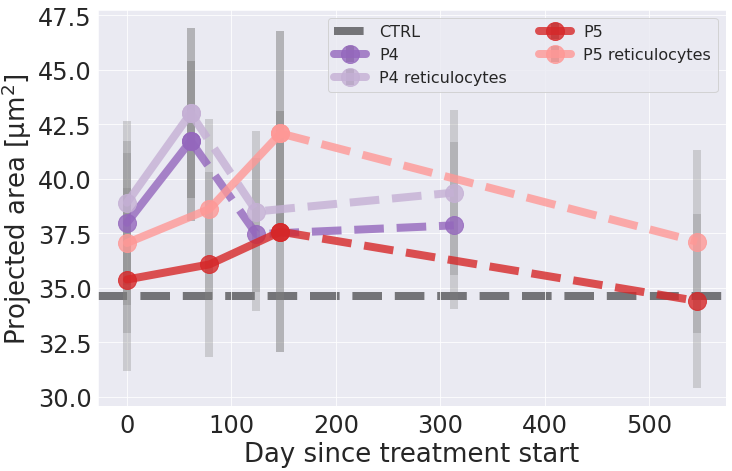

In [12]:
patients = ['LM', 'KM']
labels = ['P4', 'P5']

y_value = 'area_um'

flow_rate1 = 0.02

fontsize= 24
linewidth = 8
markersize = 18
linealpha = .8
#errorbar formatting
markerwidth = 12
errbar_width = 8

with sns.axes_style('darkgrid'):
    plt.figure(0,(10,6.6))
    ax1 = plt.subplot(111)

    ax_xlabel = "Day since treatment start"
    ax_ylabel = r"Projected area [µm$^2$]"

    ax1.set_xlabel(ax_xlabel, fontsize=fontsize+2)
    ax1.set_ylabel(ax_ylabel, fontsize=fontsize+2)

    for ind, patient in enumerate(patients):
        result_file = "20200527_results_RTfDC_" + patient + ".tsv"
        result_path = os.path.join(result_folder, result_file)

        df = pd.read_csv(result_path, sep='\t')
        df = df[np.round(df['flow rate'], 3) == flow_rate1]
        df_retis = df[df['syto13_pos']==True]

        df_date_grouped_mean = df.groupby(['date']).median().reset_index()
        df_date_grouped_mean_retis = df_retis.groupby(['date']).median().reset_index()
        df_date_grouped_std = df.groupby(['date']).std().reset_index()
        #line above doesn't work for unkown reasons
        df_date_grouped_std_retis = pd.DataFrame()
        for date in df_retis.date.unique():
            stds = df_retis[df_retis['date']==date].std()
            stds['date']=date
            df_date_grouped_std_retis = df_date_grouped_std_retis.append(stds, ignore_index=True)

        dates = pd.to_datetime(df_date_grouped_mean.reset_index()['date'])
        day0=dates[0]
        time = dates - day0
        df_date_grouped_mean['delta_days'] = time.dt.days #convert datetime in ns to days
        df_date_grouped_std['delta_days'] = time.dt.days

        dates = pd.to_datetime(df_date_grouped_mean_retis.reset_index()['date'])
        day0=dates[0]
        time = dates - day0
        df_date_grouped_mean_retis['delta_days'] = time.dt.days #convert datetime in ns to days
        df_date_grouped_std_retis['delta_days'] = time.dt.days

        color = colors[2*ind]
        color_retis = colors[2*ind+1]

        x = df_date_grouped_mean['delta_days']
        y = df_date_grouped_mean[y_value]
        yerr = df_date_grouped_std[y_value]

        x_retis = df_date_grouped_mean_retis['delta_days']
        y_retis = df_date_grouped_mean_retis[y_value]
        yerr_retis = df_date_grouped_std_retis[y_value]

        x = np.array(x)
        y = np.array(y)
        yerr = np.array(yerr)
        x_retis = np.array(x_retis)
        y_retis = np.array(y_retis)
        yerr_retis = np.array(yerr_retis)

        if patient=='LM':
            date_LM_9w = pd.to_datetime(data_LM_9w_RBC['date'])
            time_LM_9w = (date_LM_9w - day0).days
            y_LM_9w = data_LM_9w_RBC['median ' + y_value]
            yerr_LM_9w = data_LM_9w_RBC['sd ' + y_value]

            x = np.insert(x,1,time_LM_9w)
            y = np.insert(y,1,y_LM_9w)
            yerr = np.insert(yerr,1,yerr_LM_9w)

            date_LM_9w_retis = pd.to_datetime(data_LM_9w_reti['date'])
            time_LM_9w_retis = (date_LM_9w_retis - day0).days
            y_LM_9w_retis = data_LM_9w_reti['median ' + y_value]
            yerr_LM_9w_retis = data_LM_9w_reti['sd ' + y_value]

            x_retis = np.insert(x_retis, 1, time_LM_9w_retis)
            y_retis = np.insert(y_retis, 1, y_LM_9w_retis)
            yerr_retis = np.insert(yerr_retis, 1, yerr_LM_9w_retis)

            ax1.errorbar(x[:-2],y[:-2], yerr=yerr[:-2], ls='-', lw=linewidth, marker='o', c=color, ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width, label = labels[ind])
            ax1.errorbar(x[-3:],y[-3:], yerr=yerr[-3:], ls='--', lw=linewidth, marker='o', c=color,
                         ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width)
            ax1.errorbar(x_retis[:-2], y_retis[:-2], yerr=yerr_retis[:-2], ls='-', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width,
                         label = labels[ind]+" reticulocytes")
            ax1.errorbar(x_retis[-3:], y_retis[-3:], yerr=yerr_retis[-3:], ls='--', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width)
        else:
            ax1.errorbar(x[:-1],y[:-1], yerr=yerr[:-1], ls='-', lw=linewidth, marker='o', c=color, ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width, label = labels[ind])
            ax1.errorbar(x[-2:],y[-2:], yerr=yerr[-2:], ls='--', lw=linewidth, marker='o', c=color,
                         ecolor='gray', alpha=linealpha,
                         markersize = markersize, elinewidth=errbar_width)
            ax1.errorbar(x_retis[:-1], y_retis[:-1], yerr=yerr_retis[:-1], ls='-', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width,
                         label = labels[ind]+" reticulocytes")
            ax1.errorbar(x_retis[-2:], y_retis[-2:], yerr=yerr_retis[-2:], ls='--', lw=linewidth, marker='o',
                         c=color_retis, ecolor='gray',
                         alpha=linealpha, markersize = markersize, elinewidth=errbar_width)

    ax1.axhline(rbc_ctrl_medians[y_value], c='k', alpha=.5, ls='--', lw=linewidth,
                zorder=0,label='CTRL')
    plt.legend(fontsize=fontsize-8, ncol=2)
    ax1.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()

    savename = r"fig_S4D_RBC_retis_lithium_area"
    savepath = os.path.join(savefolder,savename)

    # set alpha of errorbars
    for collection in ax1.collections:
        collection.set_alpha(.3)
    plt.savefig(savepath+".pdf", dpi=900, format='pdf')

## E

In [5]:
def plot_violins(dataframe, x_axis, y_axis,
                 pal='tab10', color=None, saturation=.9, order=None,
                 fontsize_labels = 18, figsize = (6,6),
                 stripplot=False, stripalpha=0.3, stripjitter=.1):

    ort = "v"     #plot orientation
    color_ctrl = sns.color_palette('Set2')[7] #color for the control sample

    if pal == 'chac_paper_custom':
        # adapt new color palette, so that P4 is purple and P5 is red
        pal_custom = sns.color_palette('tab10', 5)
        palette = pal_custom.copy()
        palette[3] = pal_custom[4]
        palette[4] = pal_custom[3]
        palette.insert(0, color_ctrl)
    elif pal is not None:
        palette = sns.color_palette(pal)
        palette.insert(0, color_ctrl)
    else:
        palette = None

    sigma = .1    #cloud smoothness

    #some plotting parameters
    y_label = dclab.dfn.feature_name2label[y_axis]
    sns.set(style="darkgrid")

    f, ax = plt.subplots(figsize=figsize)

    ax = sns.violinplot(x = x_axis, y = y_axis, data=dataframe,
                        order=order, hue_order=order,
                        palette = palette,
                        bw = .2, cut = 0.,
                        scale = 'area',
                        inner = 'box',
                        saturation = saturation,
                        orient = ort,
                        color=color)

    if stripplot:
        ax = sns.stripplot(x = x_axis, y = y_axis, data=dataframe,
                           order=order, hue_order=order,
                           palette = palette,
                           alpha = stripalpha,
                           jitter = stripjitter,
                           orient = ort,
                           zorder=1,
                           color=color)

    ctrl_median = dataframe[dataframe['patient']=='CTRL'][y_axis].median()
    ax.axhline(ctrl_median, c='gray', alpha=.5, ls='--', zorder=1)

    ax.set_ylabel(y_label, fontsize = fontsize_labels+2)
    ax.xaxis.label.set_size(fontsize_labels)
    ax.tick_params(axis='both', which='major', labelsize=fontsize_labels)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize_labels)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
        tick.set_horizontalalignment("center")

    #adapt the sizes of the inner box in the violinplot
    for child in ax.get_children():
        #adapt widths of IQR range and 95% ci
        if isinstance(child, matplotlib.lines.Line2D):
            lw = child.get_linewidth()
            child.set_linewidth(1.75*lw)
        #change size of median marker
        if isinstance(child, matplotlib.collections.PathCollection):
            sizes = child.get_sizes()
            child.set(sizes=3*sizes)

    return f, ax

read rbc data from file

In [6]:
result_folder = r"data\RTfDC"
results_name = "20210610_RBC_baseline_plotdata.tsv"
savepath = os.path.join(result_folder, results_name)

df_rbc = pd.read_csv(savepath, sep = '\t')
df_rbc['patient_label'] = np.nan

patients = ['CTRL', 'VS', 'VL', 'RS', 'KM', 'LM']
patient_labels = ['CTRL', 'P1', 'P2', 'P3', 'P4', 'P5']
for patient, patient_label in zip(patients, patient_labels):
    ind = df_rbc['patient'] == patient
    df_rbc['patient_label'][ind] = patient_label

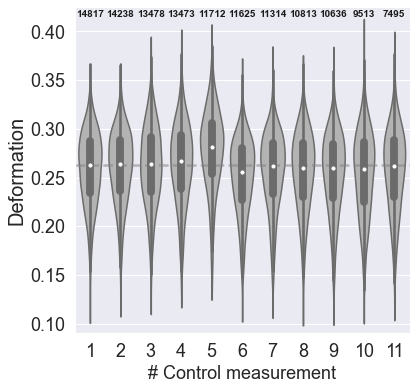

In [14]:
color_ctrl = sns.color_palette('Set2')[7]
fig, ax = plot_violins(df_rbc, 'syto_repeat', 'deform', pal=None, color=color_ctrl)

ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
ax.set_xlabel("# Control measurement")

ax.set_ylim(0.09, 0.425)

# add number of observations per violin
nobs = df_rbc['syto_repeat'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
# add it to the plot
pos = range(len(nobs))
text_y_position = .415

for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            text_y_position,
            nobs[tick],
            horizontalalignment='center',
            size='small',
            color='k',
            weight='semibold')

In [15]:
savename = "fig_S4E_RBC_baseline_ctrl_data_deform"
savepath = os.path.join(savefolder, savename)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

## F

Text(0.5, 0, '# Control measurement')

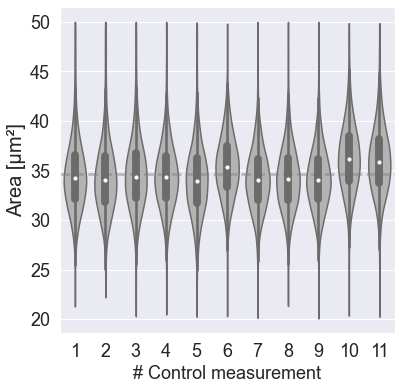

In [23]:
color_ctrl = sns.color_palette('Set2')[7]
fig, ax=plot_violins(df_rbc, 'syto_repeat', 'area_um', pal=None, color=color_ctrl)

ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11'])
ax.set_xlabel("# Control measurement")

In [24]:
savename = "fig_S4E_RBC_baseline_ctrl_data_area"
savepath = os.path.join(savefolder, savename)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

In [25]:
rbc_ctrl_deform_med = df_rbc[df_rbc['patient']=='CTRL']['deform'].median()
rbc_ctrl_area_med = df_rbc[df_rbc['patient']=='CTRL']['area_um'].median()

print("median deform = ", rbc_ctrl_deform_med)
print("median area = ", rbc_ctrl_area_med)

median deform =  0.26245954632759094
median area =  34.62220001220703
